In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
breast=load_breast_cancer()

In [3]:
breast_data=breast.data

In [4]:
breast_labels=breast.target

In [5]:
breast_data.shape

(569, 30)

In [6]:
breast_labels.shape

(569,)

In [7]:
import numpy as np
labels=np.reshape(breast_labels,(569,1))

In [8]:
final_breast_data=np.concatenate([breast_data,labels],axis=1)

In [9]:
import pandas as pd

In [10]:
breast_dataset=pd.DataFrame(final_breast_data)

In [11]:
breast_dataset.head(1)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0.0


In [12]:
features=breast.feature_names

In [13]:
features_labels=np.append(features,'label')

In [14]:
breast_dataset.columns=features_labels

In [15]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [16]:
breast_dataset['label'].replace(0,'benign',inplace=True)
breast_dataset['label'].replace(1,'malignant',inplace=True)

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x=breast_dataset.loc[:,features]
x=StandardScaler().fit_transform(x)

In [18]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [30]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [31]:
principal_breast_Df = pd.DataFrame(data=principalcomponent_breast,columns = ['principal component 1', 'principal component 2'])

In [32]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

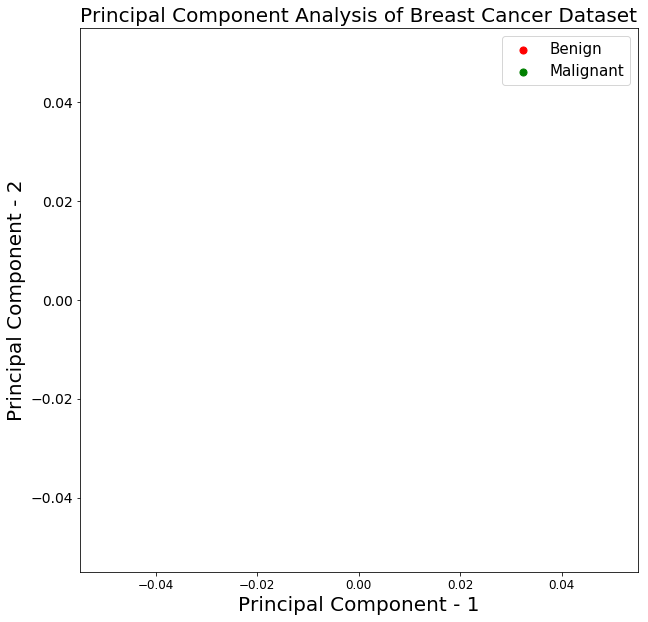

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()